# Import Libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Cleaned_World_Development_Data.csv")

In [3]:
df.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,26998.0,5.479006e+10,0.035,60.0,NaN,...,71.0,67.0,0.0,0.342,0.619,0.039,31719449,0.599,102000000.0,193000000.0
1,0.050,NaN,9542.0,Angola,NaN,7499.0,9.129595e+09,0.034,22.0,NaN,...,47.0,44.0,0.0,0.476,0.499,0.025,13924930,0.324,34000000.0,146000000.0
2,0.043,NaN,1617.0,Benin,NaN,1983.0,2.359122e+09,0.043,15.0,NaN,...,57.0,53.0,0.0,0.454,0.517,0.029,6949366,0.383,77000000.0,50000000.0
3,0.027,NaN,4276.0,Botswana,NaN,1836.0,5.788312e+09,0.047,152.0,NaN,...,52.0,49.0,0.1,0.383,0.587,0.029,1755375,0.532,227000000.0,209000000.0
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,2.610959e+09,0.051,12.0,NaN,...,52.0,49.0,0.0,0.468,0.505,0.028,11607944,0.178,23000000.0,30000000.0


# Basic Overview

In [4]:
# Check dataset dimensions and data types
print("Dataset Dimensions:", df.shape)
print("\nData Types:")
print(df.dtypes)

Dataset Dimensions: (2704, 23)

Data Types:
Birth Rate                float64
Business Tax Rate          object
CO2 Emissions             float64
Country                    object
Days to Start Business    float64
Energy Usage              float64
GDP                       float64
Health Exp % GDP          float64
Health Exp/Capita         float64
Hours to do Tax           float64
Infant Mortality Rate     float64
Internet Usage            float64
Lending Interest          float64
Life Expectancy Female    float64
Life Expectancy Male      float64
Mobile Phone Usage        float64
Population 0-14           float64
Population 15-64          float64
Population 65+            float64
Population Total            int64
Population Urban          float64
Tourism Inbound           float64
Tourism Outbound          float64
dtype: object


In [5]:
# Check data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Energy Usage            1785 non-null   float64
 6   GDP                     2494 non-null   float64
 7   Health Exp % GDP        2395 non-null   float64
 8   Health Exp/Capita       2395 non-null   float64
 9   Hours to do Tax         1416 non-null   float64
 10  Infant Mortality Rate   2444 non-null   float64
 11  Internet Usage          2531 non-null   float64
 12  Lending Interest        1880 non-null   float64
 13  Life Expectancy Female  2568 non-null   float64
 14  Life Expectancy Male    2568 non-null   

In [6]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Birth Rate                 119
Business Tax Rate         1281
CO2 Emissions              579
Country                      0
Days to Start Business     986
Energy Usage               919
GDP                        210
Health Exp % GDP           309
Health Exp/Capita          309
Hours to do Tax           1288
Infant Mortality Rate      260
Internet Usage             173
Lending Interest           824
Life Expectancy Female     136
Life Expectancy Male       136
Mobile Phone Usage         167
Population 0-14            220
Population 15-64           220
Population 65+             220
Population Total             0
Population Urban            26
Tourism Inbound            368
Tourism Outbound           471
dtype: int64


In [7]:
# Display summary statistics
print("\nSummary Statistics:")
print(df.describe(include='all'))


Summary Statistics:
         Birth Rate Business Tax Rate  CO2 Emissions  Country  \
count   2585.000000              1423   2.125000e+03     2704   
unique          NaN               447            NaN      208   
top             NaN             44.1%            NaN  Algeria   
freq            NaN                20            NaN       13   
mean       0.022715               NaN   1.423071e+05      NaN   
std        0.011338               NaN   6.159288e+05      NaN   
min        0.007000               NaN   7.000000e+00      NaN   
25%        0.013000               NaN   1.360000e+03      NaN   
50%        0.020000               NaN   8.529000e+03      NaN   
75%        0.031000               NaN   5.910800e+04      NaN   
max        0.053000               NaN   8.286892e+06      NaN   

        Days to Start Business  Energy Usage           GDP  Health Exp % GDP  \
count              1718.000000  1.785000e+03  2.494000e+03       2395.000000   
unique                     NaN        

#  Univariate Analysis

In [8]:
# List numeric columns
numeric_columns = df.select_dtypes(include=np.number).columns

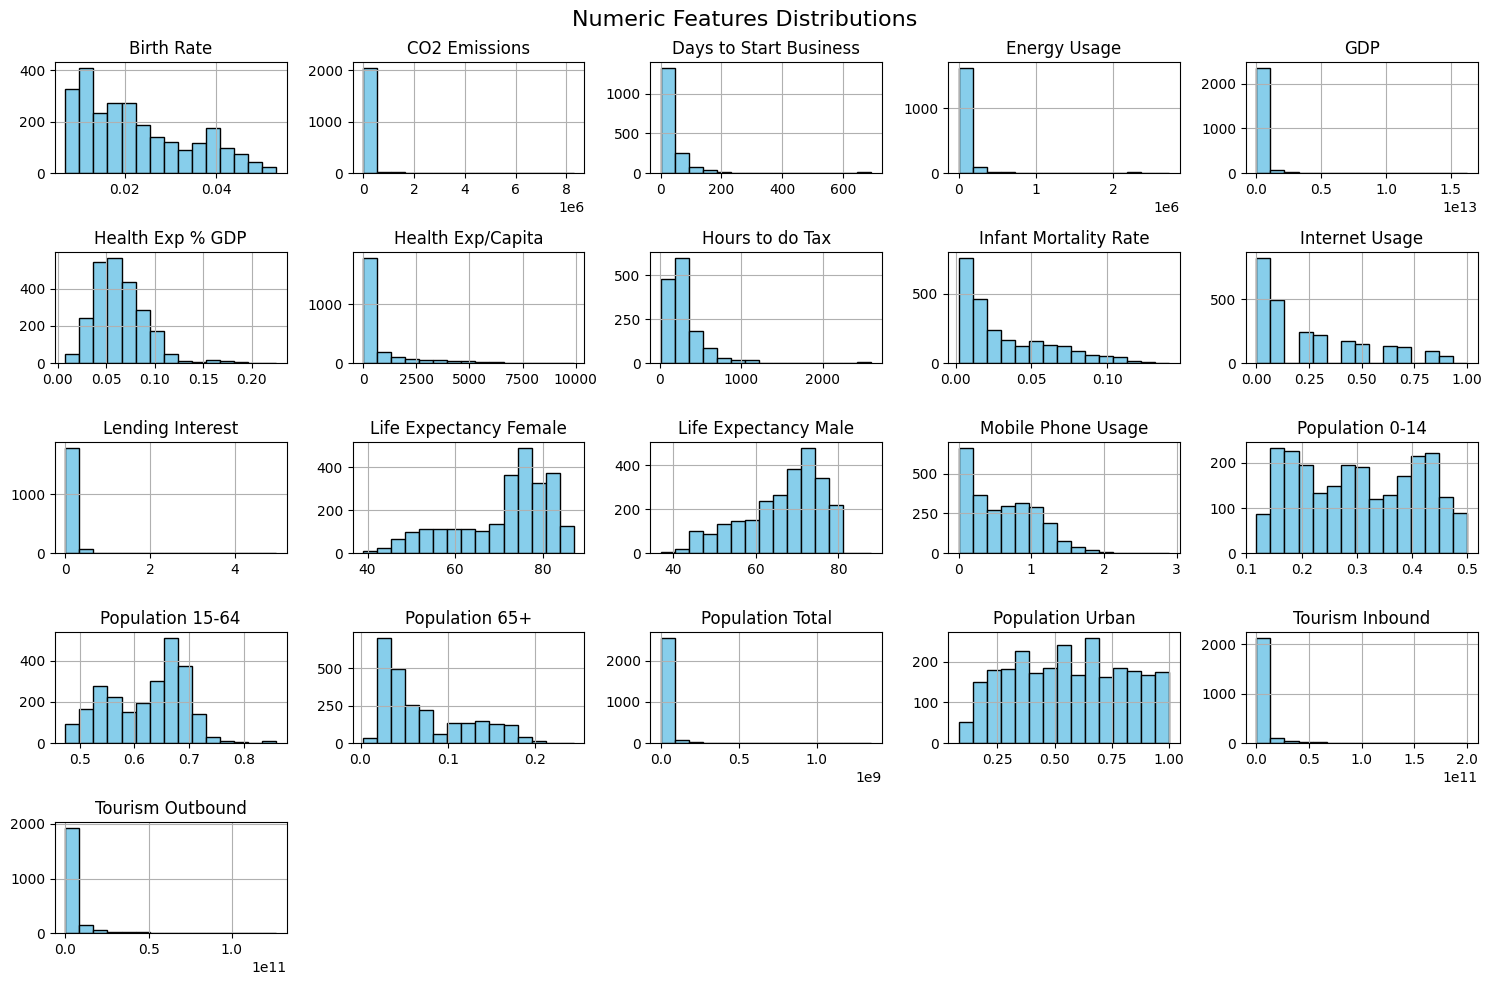

In [9]:
# Plot histograms for numeric features
df[numeric_columns].hist(figsize=(15, 10), bins=15, color='skyblue', edgecolor='black')
plt.suptitle('Numeric Features Distributions', fontsize=16)
plt.tight_layout()
plt.show()

# Bivariate Analysis

In [10]:
# Convert percentage strings to numeric values where applicable
def clean_percentage(column):
    if column.dtypes == 'object':  # Only process object (string) columns
        try:
            return column.str.replace('%', '').astype(float) / 100
        except:
            return column  # Return the column as is if conversion fails
    return column  # Return numeric columns as is

In [11]:
# Apply the cleaning function selectively
df_cleaned = df.copy()  # Create a copy to avoid modifying the original DataFrame
df_cleaned = df_cleaned.apply(clean_percentage)

In [12]:
# Check for non-numeric columns after cleaning
non_numeric_columns = df_cleaned.select_dtypes(include=['object']).columns
print("Non-numeric Columns:", non_numeric_columns)

Non-numeric Columns: Index(['Country'], dtype='object')


In [13]:
# Drop non-numeric columns for correlation analysis
df_numeric = df_cleaned.drop(columns=non_numeric_columns)

In [14]:
# Calculate correlations
correlation_matrix = df_numeric.corr()

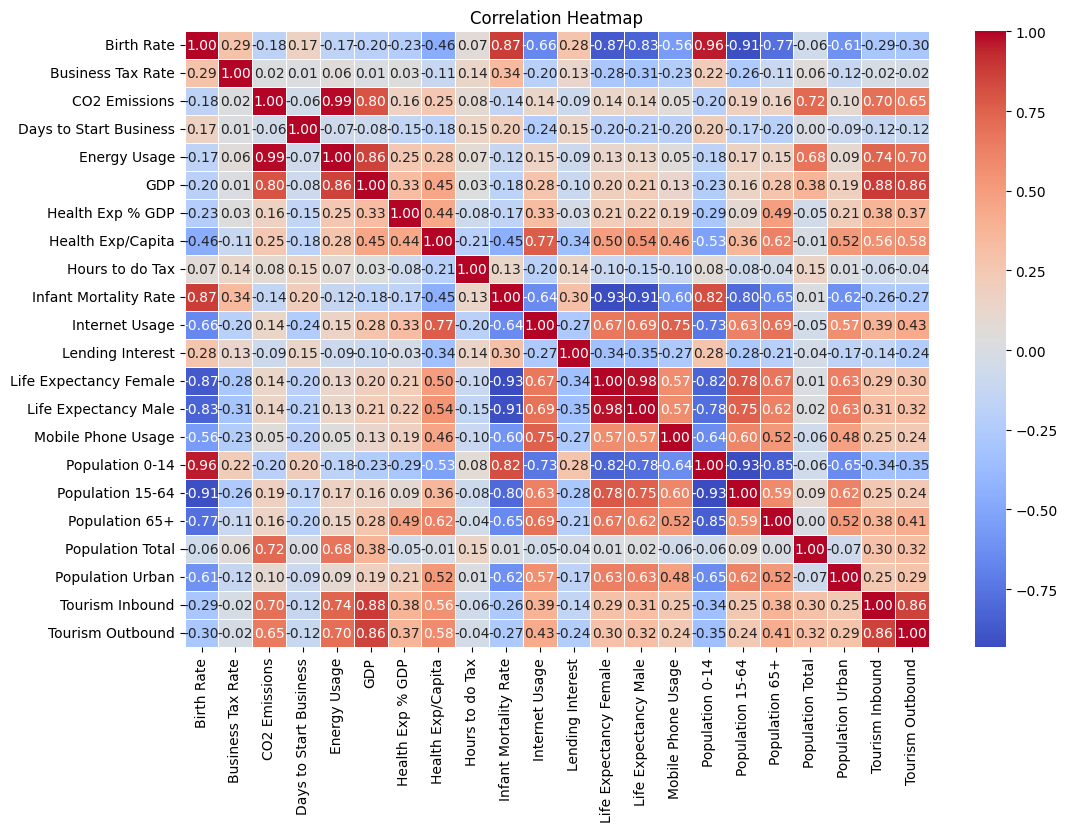

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Insights into Specific Features

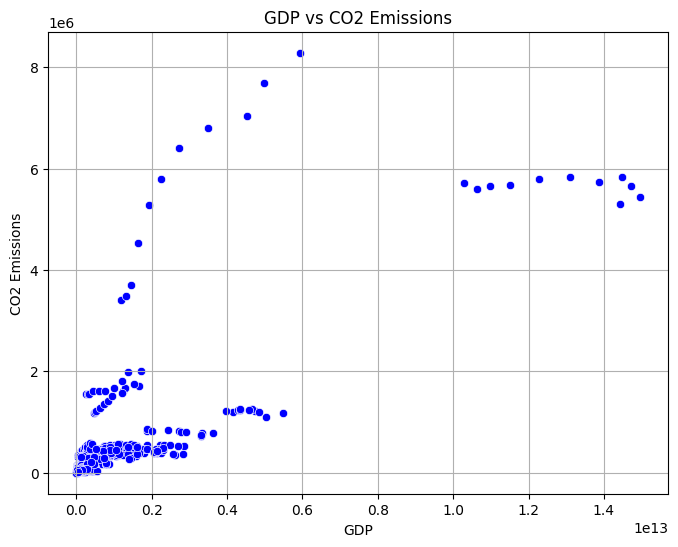

In [16]:
# Scatter plot for GDP vs CO2 Emissions
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='GDP', y='CO2 Emissions', color='blue')
plt.title('GDP vs CO2 Emissions')
plt.xlabel('GDP')
plt.ylabel('CO2 Emissions')
plt.grid()
plt.show()

In [17]:
# Percentage of missing data in each column
missing_percentage = (df_cleaned.isnull().sum() / len(df)) * 100
print("Percentage of Missing Data:")
print(missing_percentage[missing_percentage > 0])

Percentage of Missing Data:
Birth Rate                 4.400888
Business Tax Rate         47.374260
CO2 Emissions             21.412722
Days to Start Business    36.464497
Energy Usage              33.986686
GDP                        7.766272
Health Exp % GDP          11.427515
Health Exp/Capita         11.427515
Hours to do Tax           47.633136
Infant Mortality Rate      9.615385
Internet Usage             6.397929
Lending Interest          30.473373
Life Expectancy Female     5.029586
Life Expectancy Male       5.029586
Mobile Phone Usage         6.176036
Population 0-14            8.136095
Population 15-64           8.136095
Population 65+             8.136095
Population Urban           0.961538
Tourism Inbound           13.609467
Tourism Outbound          17.418639
dtype: float64


In [18]:
# Separate numeric and non-numeric columns
numeric_columns = df_cleaned.select_dtypes(include=['number']).columns
non_numeric_columns = df_cleaned.select_dtypes(exclude=['number']).columns

In [19]:
# Fill missing values for numeric columns with their mean
df_cleaned[numeric_columns] = df_cleaned[numeric_columns].fillna(df_cleaned[numeric_columns].mean())

In [20]:
# Fill missing values for non-numeric columns with a placeholder or mode
df_cleaned[non_numeric_columns] = df_cleaned[non_numeric_columns].fillna("Unknown")

In [21]:
# Verify there are no missing values left
print("Missing Values After Imputation:")
print(df_cleaned.isnull().sum())

Missing Values After Imputation:
Birth Rate                0
Business Tax Rate         0
CO2 Emissions             0
Country                   0
Days to Start Business    0
Energy Usage              0
GDP                       0
Health Exp % GDP          0
Health Exp/Capita         0
Hours to do Tax           0
Infant Mortality Rate     0
Internet Usage            0
Lending Interest          0
Life Expectancy Female    0
Life Expectancy Male      0
Mobile Phone Usage        0
Population 0-14           0
Population 15-64          0
Population 65+            0
Population Total          0
Population Urban          0
Tourism Inbound           0
Tourism Outbound          0
dtype: int64


In [22]:
# Create numeric_df by selecting numeric columns from df
numeric_df = df_cleaned[numeric_columns]

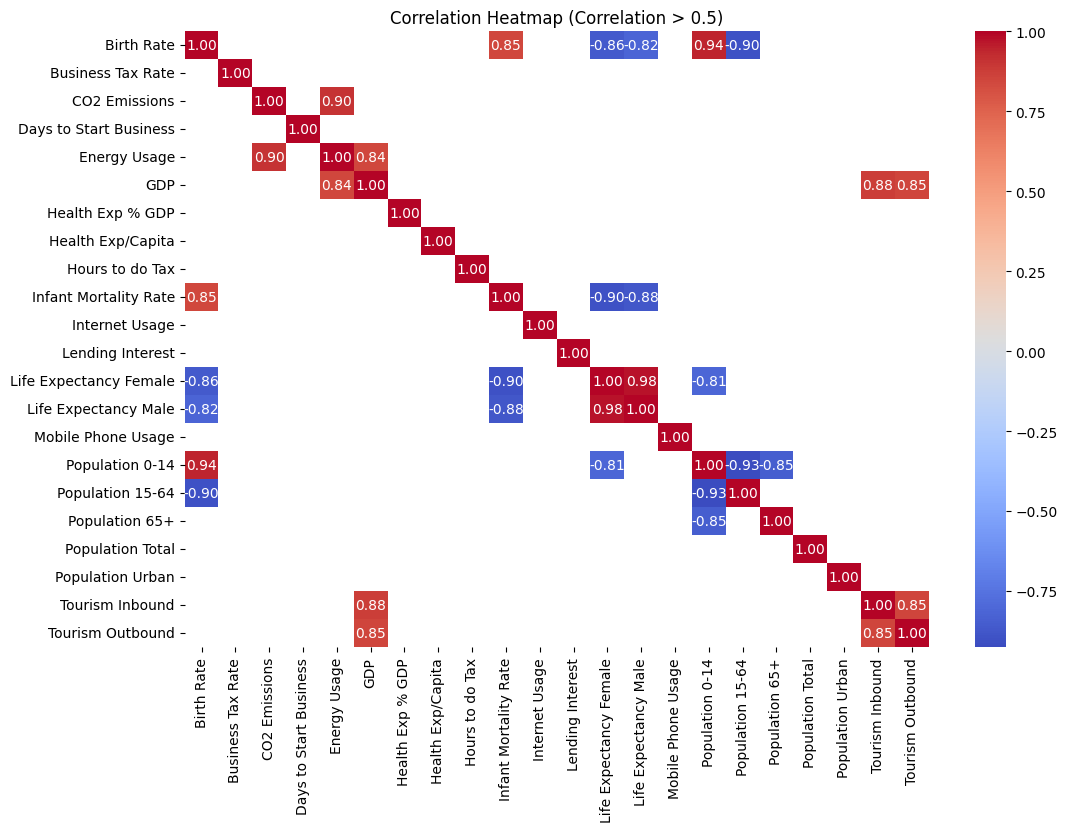

In [23]:
# heatmap of corr > (+ or -) 0.5

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'numeric_df' is already defined from your previous code.
# If not, replace numeric_df with the actual DataFrame containing numeric columns.

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Filter for correlations greater than 0.5 (absolute value)
correlation_matrix = correlation_matrix[abs(correlation_matrix) > 0.8]

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Correlation > 0.5)')
plt.show()

In [24]:
# Create nu_df DataFrame with selected columns from numeric_df
nu_df = numeric_df[['Birth Rate','GDP', 'Energy Usage', 'Infant Mortality Rate']]

In [25]:
nu_df.columns

Index(['Birth Rate', 'GDP', 'Energy Usage', 'Infant Mortality Rate'], dtype='object')

In [26]:
from sklearn.preprocessing import StandardScaler
# Standardization
scaler = StandardScaler()

# Now we can use nu_df for scaling
scaled_df = scaler.fit_transform(nu_df)

In [27]:
nu_df.isnull().sum()

,0
Birth Rate,0
GDP,0
Energy Usage,0
Infant Mortality Rate,0


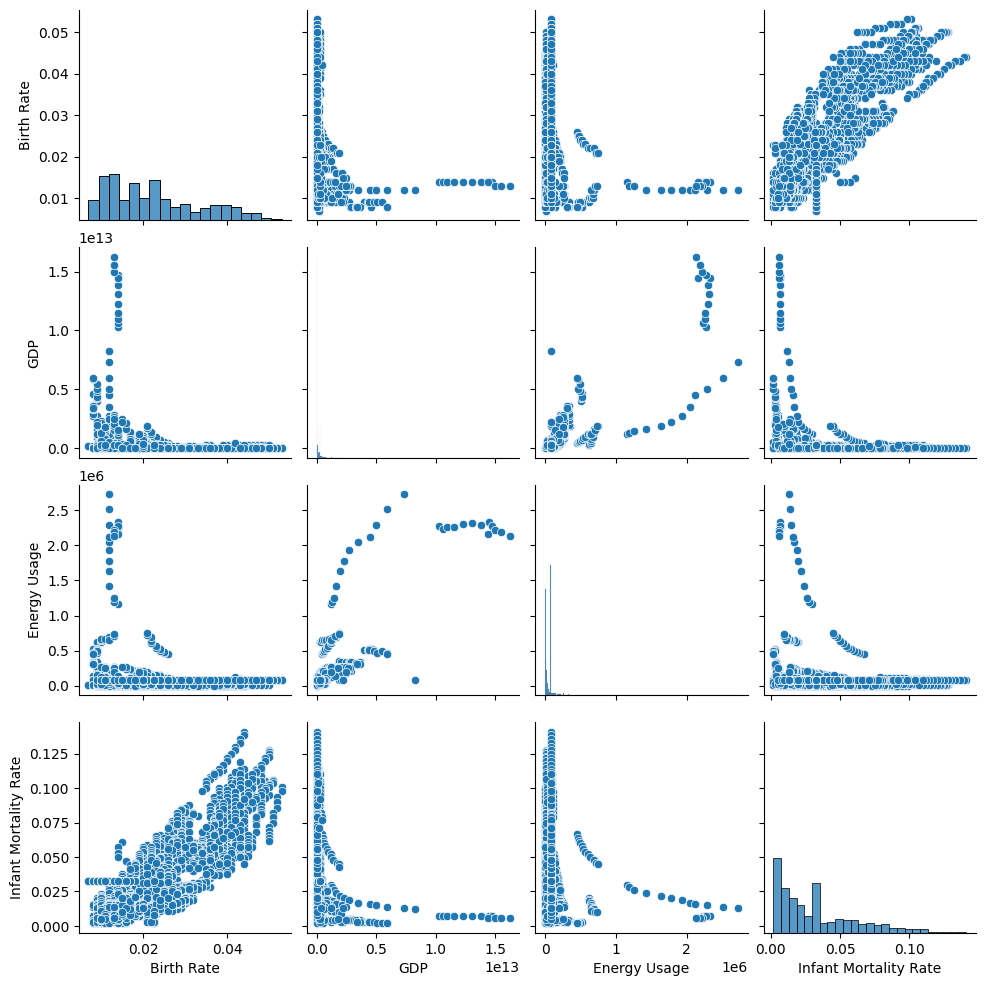

In [28]:
# Pairplot for initial insights
sns.pairplot(data=nu_df.iloc[:, :5])  # Plotting only first 5 columns for simplicity
plt.show()

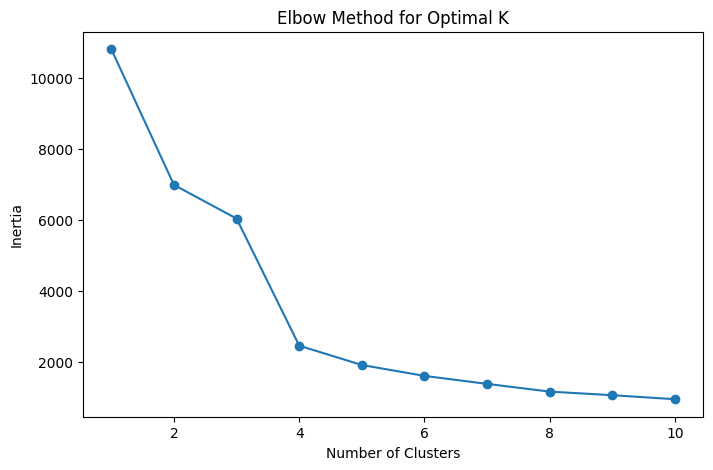

In [29]:
#K-Means Clustering
# Finding the optimal number of clusters using Elbow Method
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    # Use the correct variable name 'scaled_df' here
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

#KMEANS

In [30]:
# Final K-Means Model
optimal_clusters = 2 # Based on the Elbow plot
kmeans_model = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_labels = kmeans_model.fit_predict(scaled_df)
import numpy as np

# Get the centroids of the clusters
centroids = kmeans_model.cluster_centers_

# Print the centroids for interpretation
print("Cluster Centroids:")
print(centroids)


Cluster Centroids:
[[ 6.43030973e-03 -6.83198592e-02 -7.61094036e-02  5.95479522e-03]
 [-8.62947566e-01  9.16852510e+00  1.02138820e+01 -7.99133518e-01]]


In [31]:
if centroids[0][1] > centroids[1][1] and centroids[0][2] > centroids[1][2]:
    cluster_labels = {0: "Developed", 1: "Underdeveloped"}
else:
    cluster_labels = {0: "Underdeveloped", 1: "Developed"}


In [32]:
# Add the cluster labels as a new column 'developed' to the nu_df DataFrame
da = nu_df.copy()  # Create a copy to avoid modifying the original
da['developed'] = kmeans_labels

# Map cluster labels to 0 and 1 based on your earlier defined mapping (cluster_labels)
da['developed'] = da['developed'].map(lambda x: 1 if cluster_labels[x] == 'Developed' else 0)

#Now da dataframe has the new column 'developed' with values 0 and 1.
print(da.head())

   Birth Rate           GDP  Energy Usage  Infant Mortality Rate  developed
0       0.020  5.479006e+10  26998.000000                  0.034          0
1       0.050  9.129595e+09   7499.000000                  0.128          0
2       0.043  2.359122e+09   1983.000000                  0.090          0
3       0.027  5.788312e+09   1836.000000                  0.054          0
4       0.046  2.610959e+09  77236.840896                  0.096          0


In [33]:
# Display the first 5 rows where 'developed' is equal to 1
print(da[da['developed'] == 1].head())

      Birth Rate           GDP  Energy Usage  Infant Mortality Rate  developed
204        0.014  1.028970e+13     2273332.0                  0.007          1
412        0.014  1.062530e+13     2230817.0                  0.007          1
620        0.014  1.098020e+13     2255957.0                  0.007          1
828        0.014  1.151220e+13     2261151.0                  0.007          1
1036       0.014  1.227700e+13     2307819.0                  0.007          1


In [34]:
kmeans_labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [35]:
len(kmeans_labels)

2704

In [36]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
# K-Means Metrics
kmeans_silhouette = silhouette_score(scaled_df, kmeans_labels)
kmeans_davies = davies_bouldin_score(scaled_df, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette}")
print(f"K-Means Davies-Bouldin Score: {kmeans_davies}")

K-Means Silhouette Score: 0.8683018172601111
K-Means Davies-Bouldin Score: 0.3699417929953791


In [37]:
#saving the model
import joblib

joblib.dump(kmeans_model, 'kmeans_model.joblib')

['kmeans_model.joblib']

#HIERARCHICAL CLUSTERING (agglomerative approach)

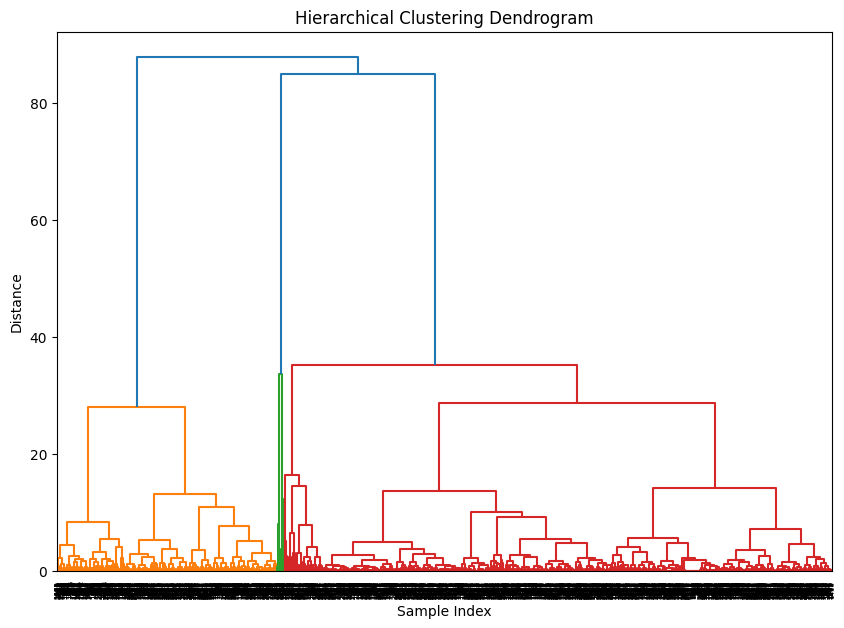

In [38]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
#Hierarchical Clustering
# Dendrogram
linkage_matrix = linkage(scaled_df, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [39]:
# Assigning clusters from Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
agglomerative = AgglomerativeClustering(n_clusters=2, linkage='ward')
agglomerative_labels = agglomerative.fit_predict(scaled_df)

In [40]:
agglomerative_labels

array([0, 1, 1, ..., 0, 0, 0])

In [41]:
# prompt: find the silhoutte score of agglomerative

# Calculate and print the silhouette score for agglomerative clustering
agglomerative_silhouette = silhouette_score(scaled_df, agglomerative_labels)
print(f"Agglomerative Silhouette Score: {agglomerative_silhouette}")

Agglomerative Silhouette Score: 0.5223173090964448


#DBSCAN

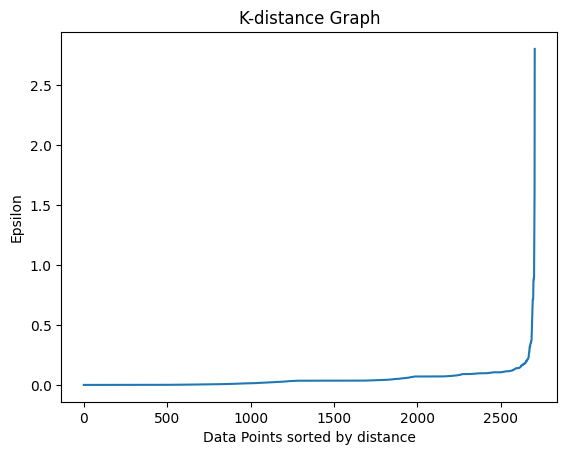

In [42]:
from sklearn.neighbors import NearestNeighbors
nearest_n = NearestNeighbors(n_neighbors=2)
nearest_n.fit(scaled_df)
distances, indices = nearest_n.kneighbors(scaled_df)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.title('K-distance Graph')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.show()

In [43]:
#DBSCAN Clustering
from sklearn.cluster import DBSCAN
dbscan_model = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan_model.fit_predict(scaled_df)

In [44]:
dbscan_labels

array([0, 0, 0, ..., 0, 0, 0])

In [45]:
import numpy as np
dbscancluster_labels = np.unique(dbscan_labels)
print(f"Unique values in dbscan_labels: {dbscancluster_labels}")

Unique values in dbscan_labels: [-1  0  1  2  3]


In [46]:
# DBSCAN Metrics
if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(scaled_df, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")
else:
    dbscan_silhouette = None
    print("DBSCAN did not form multiple clusters.")

DBSCAN Silhouette Score: 0.3788365311437738


# TUNED DBSCAN MODEL

In [47]:
from sklearn.model_selection import ParameterGrid

# Define the parameter grid for DBSCAN
param_grid = {
    'eps': [0.3, 0.5, 0.7, 1.0],  # Adjust the range of epsilon values
    'min_samples': [1, 2, 3, 5, 10, 15] # Adjust the range of min_samples values
}

best_score = -1
best_params = {}

for params in ParameterGrid(param_grid):
    dbscan_model = DBSCAN(**params)
    Tuned_dbscan_labels = dbscan_model.fit_predict(scaled_df)

    # Handle cases where DBSCAN creates only one cluster
    if len(set(Tuned_dbscan_labels)) > 1:
        score = silhouette_score(scaled_df, Tuned_dbscan_labels)
        if score > best_score:
            best_score = score
            best_params = params

print(f"Best DBSCAN parameters: {best_params}")
print(f"Best Silhouette Score: {best_score}")

# Train final model with best hyperparameters
best_dbscan_model = DBSCAN(**best_params)
best_dbscan_model.fit(scaled_df)

Best DBSCAN parameters: {'eps': 0.7, 'min_samples': 15}
Best Silhouette Score: 0.7456747847652362


DBSCAN(eps=0.7, min_samples=15)

In [48]:
#Comparative Analysis
results = {
    'Model': ['K-Means', 'Hierarchical', 'TUNED DBSCAN'],
    'Silhouette Score': [kmeans_silhouette, agglomerative_silhouette, best_score],
    'Davies-Bouldin Score': [kmeans_davies, None, None]
}
results_df = pd.DataFrame(results)
print("Comparative Analysis of Clustering Models:")
print(results_df)

Comparative Analysis of Clustering Models:
          Model  Silhouette Score  Davies-Bouldin Score
0       K-Means          0.868302              0.369942
1  Hierarchical          0.522317                   NaN
2  TUNED DBSCAN          0.745675                   NaN


#Visualization of clusters

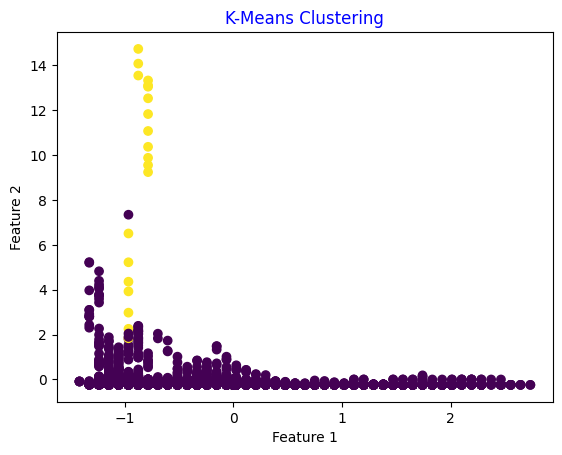

In [49]:
# Plot the K-means clusters using scatter plot
plt.scatter(scaled_df[:, 0], scaled_df[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering', color='blue')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

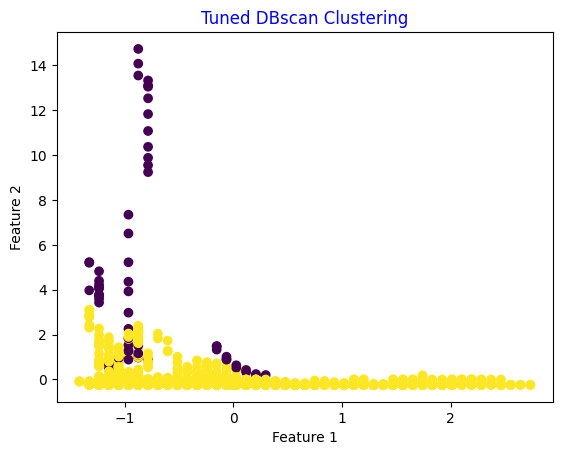

In [50]:
# Plot the Tuned DBscan clusters using scatter plot
plt.scatter(scaled_df[:, 0], scaled_df[:, 1], c=Tuned_dbscan_labels, cmap='viridis')
plt.title('Tuned DBscan Clustering', color='blue')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

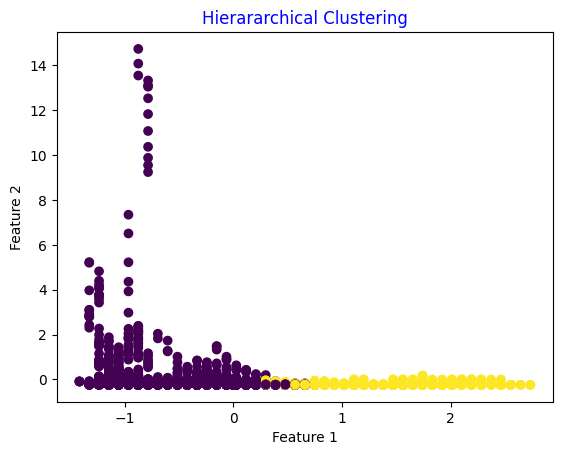

In [51]:
# Plot the Hierarchical clusters using scatter plot
plt.scatter(scaled_df[:, 0], scaled_df[:, 1], c=agglomerative_labels, cmap='viridis')
plt.title('Hierararchical Clustering', color='blue')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [56]:
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

#Deployment

In [57]:

import streamlit as st
import joblib
import pandas as pd
import numpy as np

# Load the trained KMeans model and scaler
kmeans_model = joblib.load('kmeans_model.joblib')
scaler = joblib.load('scaler.joblib')  # Load the pre-trained scaler

st.title('Country Development Classification')

# Input fields in the Streamlit app
Birth_Rate = st.number_input("Enter Birth Rate", value=0.0)
GDP = st.number_input("Enter GDP",  value=0.0)
Energy_Usage = st.number_input("Enter Energy Usage",  value=0.0)
Infant_Mortality_Rate = st.number_input("Enter Infant Mortality Rate", value=0.0)

# Create a dictionary for user input
input_data = {
    'Birth Rate': Birth_Rate,
    'GDP': GDP,
    'Energy Usage': Energy_Usage,
    'Infant Mortality Rate': Infant_Mortality_Rate
}

# Convert input data to DataFrame
input_df = pd.DataFrame([input_data])

# Cluster labels mapping
cluster_labels = {0: "Underdeveloped", 1: "Developed"}

# Validate and process input
if input_df.isnull().values.any():
    st.error("Please fill in all the required fields.")
else:
    try:
        # Standardize input data using the loaded scaler
        scaled_input_data = scaler.transform(input_df)
        # Predict the cluster
        cluster_id = kmeans_model.predict(scaled_input_data)[0]
        # Get the human-readable label
        cluster_label = cluster_labels[cluster_id]
        # Display the result
        st.success(f'The country is classified as: {cluster_label}')
    except Exception as e:
        st.error(f"An error occurred: {e}")

2025-01-17 12:11:26.416 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-17 12:11:26.425 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-17 12:11:26.429 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-17 12:11:26.433 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-17 12:11:26.436 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-17 12:11:26.438 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-17 12:11:26.442 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-17 12:11:26.445 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar